# EDA de imágenes

<div style="border-left: 4px solid #f0ad4e; padding: 0.5em 1em; background: #f5f5f5; color: black;">
<b>Atención! (Solo para quienes usen Conda): esta notebook requiere utilizar el env add-aml</b>

```bash
(conda env create -f environment_bonus.yml)
```

### Objetivo

Descubrir patrones ocultos o errores antes de aplicar un modelo.

Qué analizamos en una imagen:
- Resoluciones y tamaños
- Distribución de los valores de los píxeles (histogramas)
- Colores, iluminación, enfoque, orientación, ruido etc.

Si vamos a clasificar:
- Visualizamos imágenes aleatorias por clase para ver si las clases son distinguibles.
- Distribución de clases (si es para clasificación) para detectar desbalanceo.
- Etiquetado

Luego del análisis se puede preparar las imágenes con distintas operaciones:
redimensionar, convertir a escala de grises, aumentar contraste/brillo, usar augmentation, etc.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10


In [2]:
# Load CIFAR-10 (100 imágenes solamente)
(X_train, y_train), (_, _) = cifar10.load_data()
X_train = X_train[:100]
y_train = y_train[:100]

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

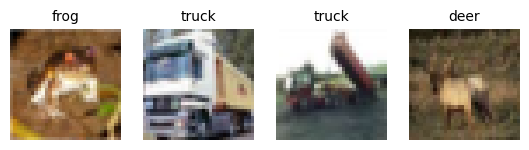

In [3]:
# Visualizar algunas imágenes
plt.figure(figsize=(10, 2))
for i in range(4):
    plt.subplot(1, 6, i+1)
    plt.imshow(X_train[i])
    label = class_names[y_train[i][0]]
    plt.title(label, fontsize=10)
    plt.axis('off')
plt.show()

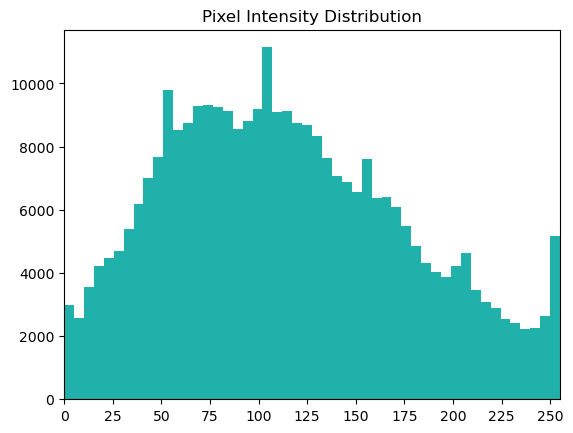

In [4]:
# Histograma de intensidad de pixel (train)
plt.hist(X_train.ravel(), bins=50, color='lightseagreen')
plt.title('Pixel Intensity Distribution')
plt.xticks(range(0, 255,25)) 
plt.xlim(0,255)
plt.show()

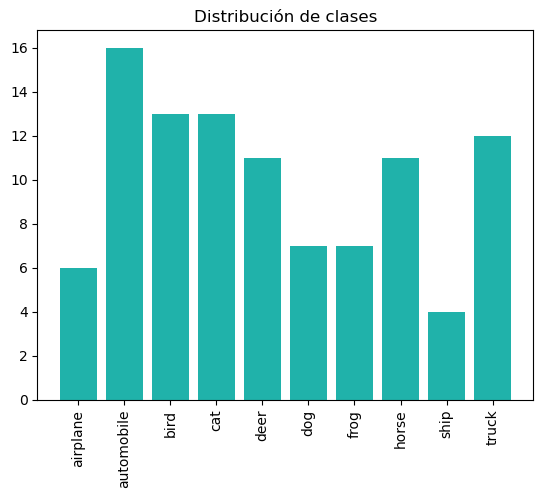

In [5]:
# Distribución de clases de train
classes, counts = np.unique(y_train, return_counts=True)
plt.bar(class_names, counts, color='lightseagreen')
plt.xticks(rotation=90)
plt.title('Distribución de clases')
plt.show()